# Uploading and Displaying Data

In [33]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\silve\Downloads\global_power_plant_database_v_1_3\global_power_plant_database.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.info())

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

C:\Users\silve\AppData\Local\Temp\ipykernel_10964\1777790124.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


# Checking for missing values

In [34]:
# Check for missing values
missing_df = df.isnull().sum()

# Filter only columns with missing data
missing_columns = missing_df[missing_df > 0]
print("Columns with missing values:\n", missing_columns)

# Display the percentage of missing data for each column
missing_percentage = (missing_columns / df.shape[0]) * 100
print("\nPercentage of missing values:\n", missing_percentage)


Columns with missing values:
 other_fuel1                      32992
other_fuel2                      34660
other_fuel3                      34844
commissioning_year               17489
owner                            14068
source                              15
url                                 18
geolocation_source                 419
wepp_id                          18702
year_of_capacity_data            20049
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
generation_data_source           23536
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
estimated_generation_gwh_2016    17366
estimated_generation_gwh_2017     1798
dtype: int64

Percentage of missing values:
 other_fuel1                 

# Converting commissing year to plant age (age of powerplant)

In [35]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Convert commissioning_year to plant_age by subtracting it from the current year
df['plant_age'] = current_year - df['commissioning_year']

# Display the first few rows to check the result
df[['commissioning_year', 'plant_age']].head()


,commissioning_year,plant_age
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [36]:
df.info

<bound method DataFrame.info of       country country_long                                               name  \
0         AFG  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1         AFG  Afghanistan                                       Kandahar DOG   
2         AFG  Afghanistan                                       Kandahar JOL   
3         AFG  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
4         AFG  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
...       ...          ...                                                ...   
34931     ZMB       Zambia                                              Ndola   
34932     ZMB       Zambia                                              Nkana   
34933     ZMB       Zambia                                     Victoria Falls   
34934     ZWE     Zimbabwe                   Hwange Coal Power Plant Zimbabwe   
34935     ZWE     Zimbabwe  Kariba Dam South Hydroelectric Power Station Z...

In [37]:
df.shape

(34936, 37)

In [38]:
df.describe

<bound method NDFrame.describe of       country country_long                                               name  \
0         AFG  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1         AFG  Afghanistan                                       Kandahar DOG   
2         AFG  Afghanistan                                       Kandahar JOL   
3         AFG  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
4         AFG  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
...       ...          ...                                                ...   
34931     ZMB       Zambia                                              Ndola   
34932     ZMB       Zambia                                              Nkana   
34933     ZMB       Zambia                                     Victoria Falls   
34934     ZWE     Zimbabwe                   Hwange Coal Power Plant Zimbabwe   
34935     ZWE     Zimbabwe  Kariba Dam South Hydroelectric Power Station Z.

# Exploring descriptive statistics 

In [39]:
# Descriptive statistics for numerical features
df.describe()

# Descriptive statistics for categorical features (like primary_fuel)
df['primary_fuel'].value_counts()

# You can also include both categorical and numerical data together (useful when you have mixed types)
df.describe(include='all')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,plant_age
count,34936,34936,34936,34936,34936.000000,34936.000000,34936.000000,34936,1944,276,...,16503.000000,17050.000000,17570.000000,33138.000000,34936,34936,34936,34936,34936,17447.000000
unique,167,167,34528,34936,NaN,NaN,NaN,15,12,11,...,NaN,NaN,NaN,NaN,5,5,5,5,6,NaN
top,USA,United States of America,Santo Antônio,GEODB0040538,NaN,NaN,NaN,Solar,Oil,Gas,...,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,NaN
freq,9833,9833,6,1,NaN,NaN,NaN,10665,1169,100,...,NaN,NaN,NaN,NaN,18816,18433,17886,17366,14942,NaN
mean,NaN,NaN,NaN,NaN,163.355148,32.816637,-6.972803,NaN,NaN,NaN,...,242.431122,235.866067,235.695265,716.443378,NaN,NaN,NaN,NaN,NaN,26.585177
std,NaN,NaN,NaN,NaN,489.636072,22.638603,78.405850,NaN,NaN,NaN,...,1285.798297,1267.005223,1259.559841,2484.361200,NaN,NaN,NaN,NaN,NaN,23.397835
min,NaN,NaN,NaN,NaN,1.000000,-77.847000,-179.977700,NaN,NaN,NaN,...,0.870000,0.440000,0.300000,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,NaN,NaN,NaN,4.900000,29.256475,-77.641550,NaN,NaN,NaN,...,8.680000,8.380000,8.322500,8.180000,NaN,NaN,NaN,NaN,NaN,10.000000
50%,NaN,NaN,NaN,NaN,16.745000,39.727750,-2.127100,NaN,NaN,NaN,...,28.250000,26.830000,27.555000,37.590000,NaN,NaN,NaN,NaN,NaN,17.000000
75%,NaN,NaN,NaN,NaN,75.344250,46.263125,49.502675,NaN,NaN,NaN,...,106.980000,103.120000,107.237500,229.565000,NaN,NaN,NaN,NaN,NaN,36.000000


# Removing plants with multiple fuel types because distribution is not known, focsuing on the majority

In [40]:
# Drop rows where either 'other_fuel1' or 'other_fuel2' is not null
df_cleaned = df[(df['other_fuel1'].isnull()) & (df['other_fuel2'].isnull())]

# Check the shape of the cleaned DataFrame
df_cleaned.shape


(32992, 37)

Grouping renewable fuels 

In [41]:
# List of fuel types to group into 'Other Renewable'
renewable_fuels = ['Biomass', 'Waste', 'Geothermal', 'Cogeneration', 'Other', 'Petcoke', 'Storage', 'Wave and Tidal']

# Use .loc to avoid the SettingWithCopyWarning
df_cleaned.loc[:, 'primary_fuel'] = df_cleaned['primary_fuel'].apply(lambda x: 'Other Renewable' if x in renewable_fuels else x)

# Check the updated column
df_cleaned[['primary_fuel']].head()



,primary_fuel
0,Hydro
1,Solar
2,Solar
3,Hydro
4,Hydro


In [42]:
# Calculate the percentage of each primary fuel type
fuel_type_percentage = df_cleaned['primary_fuel'].value_counts(normalize=True) * 100

# Display the percentage of each fuel type
print(fuel_type_percentage)


primary_fuel
Solar              32.195684
Hydro              21.677983
Wind               16.149370
Gas                 9.314379
Other Renewable     7.904947
Oil                 6.395490
Coal                5.786251
Nuclear             0.575897
Name: proportion, dtype: float64


Calculating Average Generation from actual, using estimated if not present

In [43]:
# List of actual generation columns (replace these with actual column names if available)
actual_generation_columns = [
    'generation_gwh_2013', 
    'generation_gwh_2014', 
    'generation_gwh_2015', 
    'generation_gwh_2016', 
    'generation_gwh_2017'
]

# List of corresponding estimated generation columns
estimated_generation_columns = [
    'estimated_generation_gwh_2013', 
    'estimated_generation_gwh_2014', 
    'estimated_generation_gwh_2015', 
    'estimated_generation_gwh_2016', 
    'estimated_generation_gwh_2017'
]

# Create a function to prioritize actual over estimated generation data
def get_average_generation(row):
    actual_values = row[actual_generation_columns].dropna()
    estimated_values = row[estimated_generation_columns].dropna()

    # If there are actual generation values, take the average of those
    if not actual_values.empty:
        return actual_values.mean()
    # Otherwise, fall back to the estimated generation values
    elif not estimated_values.empty:
        return estimated_values.mean()
    else:
        return None

# Apply the function to each row using .loc to avoid the SettingWithCopyWarning
df_cleaned.loc[:, 'average_generation'] = df_cleaned.apply(get_average_generation, axis=1)

# Check the resulting dataframe with the new 'average_generation' column
df_cleaned[['average_generation']].head()


C:\Users\silve\AppData\Local\Temp\ipykernel_10964\3419115286.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'average_generation'] = df_cleaned.apply(get_average_generation, axis=1)


,average_generation
0,128.264
1,18.030
2,18.332
3,196.120
4,356.110


Inputing missing plant ages by mean

In [44]:
# Calculate the mean of the 'plant_age' column, ignoring NaN values
mean_plant_age = df_cleaned['plant_age'].mean()

# Use .loc to safely impute missing values
df_cleaned.loc[:, 'plant_age'] = df_cleaned['plant_age'].fillna(mean_plant_age)

# Check if there are any missing values left in 'plant_age'
print(df_cleaned['plant_age'].isnull().sum())

# Optional: Confirm the imputation by displaying the first few rows
print(df_cleaned[['plant_age']].head())



0
   plant_age
0  25.826501
1  25.826501
2  25.826501
3  25.826501
4  25.826501


# Recalculating average generation and binning into generation classes

In [45]:
# Define the columns for actual and estimated generation for the years 2013 to 2017
actual_generation_columns = [
    'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'
]

estimated_generation_columns = [
    'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 
    'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017'
]

# Create a function to calculate the average generation
def get_average_generation(row):
    actual_values = row[actual_generation_columns].dropna()
    estimated_values = row[estimated_generation_columns].dropna()
    
    # If actual values are available, use their average
    if not actual_values.empty:
        return actual_values.mean()
    # Otherwise, use the estimated values
    elif not estimated_values.empty:
        return estimated_values.mean()
    # If neither is available, return NaN
    else:
        return None

# Apply the function to calculate the average generation in df_cleaned
df_cleaned['average_generation'] = df_cleaned.apply(get_average_generation, axis=1)

# Now proceed with the binning logic for generation_class_4
bins = [-float('inf'), 10, 50, 200, float('inf')]  # Custom bins
labels = ['very_low', 'low', 'mid', 'high']  # Labels for the classes

# Safely create the 'generation_class_4' column in df_cleaned
df_cleaned['generation_class_4'] = pd.cut(df_cleaned['average_generation'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of the new 4-class target
generation_class_counts = df_cleaned['generation_class_4'].value_counts()

# Display the counts and check the resulting dataframe
print(generation_class_counts)
df_cleaned[['average_generation', 'generation_class_4']].head()


generation_class_4
very_low    9514
low         8369
high        7283
mid         6355
Name: count, dtype: int64


C:\Users\silve\AppData\Local\Temp\ipykernel_10964\821007718.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['average_generation'] = df_cleaned.apply(get_average_generation, axis=1)
C:\Users\silve\AppData\Local\Temp\ipykernel_10964\821007718.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['generation_class_4'] = pd.cut(df_cleaned['average_generation'], bins=bins, labels=labels, include_lowest=True)


,average_generation,generation_class_4
0,128.264,mid
1,18.030,low
2,18.332,low
3,196.120,mid
4,356.110,high


In [46]:
# Select feature columns and the target column
columns_to_check = ['latitude', 'longitude', 'plant_age', 'capacity_mw', 'average_generation', 'generation_class_4']

# Check for missing values in the selected columns
missing_values = df_cleaned[columns_to_check].isnull().sum()

# Display columns with missing values
print("Missing values in target and feature columns:\n", missing_values)



Missing values in target and feature columns:
 latitude                 0
longitude                0
plant_age                0
capacity_mw              0
average_generation    1471
generation_class_4    1471
dtype: int64


# Inputting missing generation classes by mean 

In [47]:
# Calculate the mean of the non-missing values in 'average_generation'
mean_average_generation = df_cleaned['average_generation'].mean()

# Fill missing values with the mean
df_cleaned['average_generation'].fillna(mean_average_generation, inplace=True)

# Now proceed with the binning logic for generation_class_4
bins = [-float('inf'), 10, 50, 200, float('inf')]  # Custom bins
labels = ['very_low', 'low', 'mid', 'high']  # Labels for the classes

# Recalculate the 'generation_class_4' column after imputing missing values
df_cleaned['generation_class_4'] = pd.cut(df_cleaned['average_generation'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of the new 4-class target
generation_class_counts = df_cleaned['generation_class_4'].value_counts()

# Display the counts and check the resulting dataframe
print(generation_class_counts)
df_cleaned[['average_generation', 'generation_class_4']].head()


generation_class_4
very_low    9514
high        8754
low         8369
mid         6355
Name: count, dtype: int64


C:\Users\silve\AppData\Local\Temp\ipykernel_10964\800079523.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['average_generation'].fillna(mean_average_generation, inplace=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_10964\800079523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['average_generation'].fillna(me

,average_generation,generation_class_4
0,128.264,mid
1,18.030,low
2,18.332,low
3,196.120,mid
4,356.110,high


In [48]:
# Select feature columns and the target column
columns_to_check = ['latitude', 'longitude', 'plant_age', 'capacity_mw', 'average_generation', 'generation_class_4']

# Check for missing values in the selected columns
missing_values = df_cleaned[columns_to_check].isnull().sum()

# Display columns with missing values
print("Missing values in target and feature columns:\n", missing_values)


Missing values in target and feature columns:
 latitude              0
longitude             0
plant_age             0
capacity_mw           0
average_generation    0
generation_class_4    0
dtype: int64


In [49]:
# Check for missing values in 'primary_fuel'
missing_fuel = df_cleaned['primary_fuel'].isnull().sum()
print(f"Missing values in 'primary_fuel': {missing_fuel}")


Missing values in 'primary_fuel': 0


In [50]:
df_cleaned.shape

(32992, 39)

## Exploratory Data Analysis 
 Total Capacity by Primary Fuel Type 

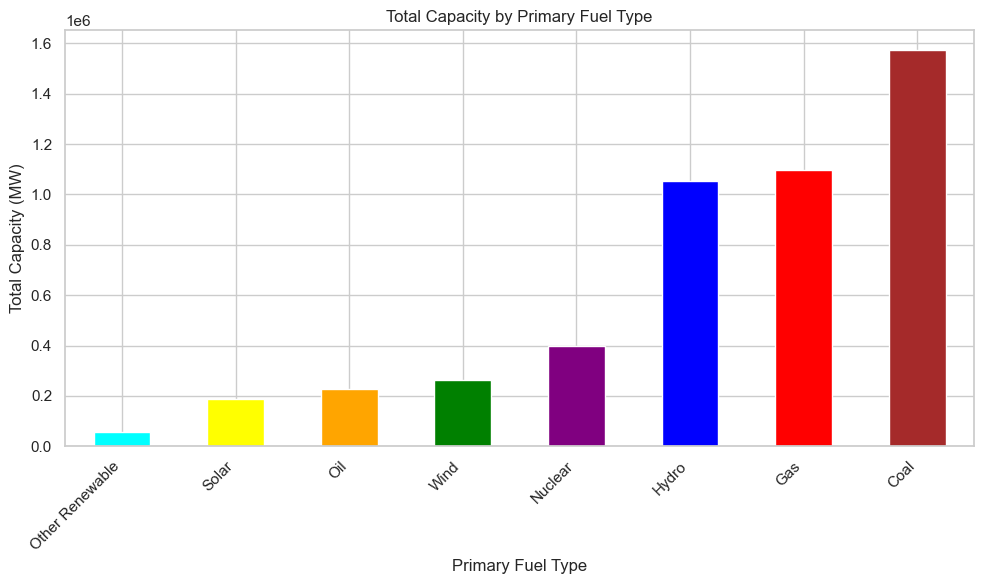

In [51]:
import matplotlib.pyplot as plt

# Group the data by primary fuel and calculate the total capacity for each fuel type
capacity_by_fuel_type = df_cleaned.groupby('primary_fuel')['capacity_mw'].sum().sort_values()

# Define the colors for each bar manually (make sure the number of colors matches the number of bars)
bar_colors = ['cyan', 'yellow', 'orange', 'green', 'purple', 'blue', 'red','brown']  # Example colors

# Create a bar chart with manually set colors
plt.figure(figsize=(10, 6))
capacity_by_fuel_type.plot(kind='bar', color=bar_colors[:len(capacity_by_fuel_type)])  # Ensure the color list is the same length as the number of bars

# Add labels and title
plt.xlabel('Primary Fuel Type')
plt.ylabel('Total Capacity (MW)')
plt.title('Total Capacity by Primary Fuel Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()



Total Generation By Fuel Type 

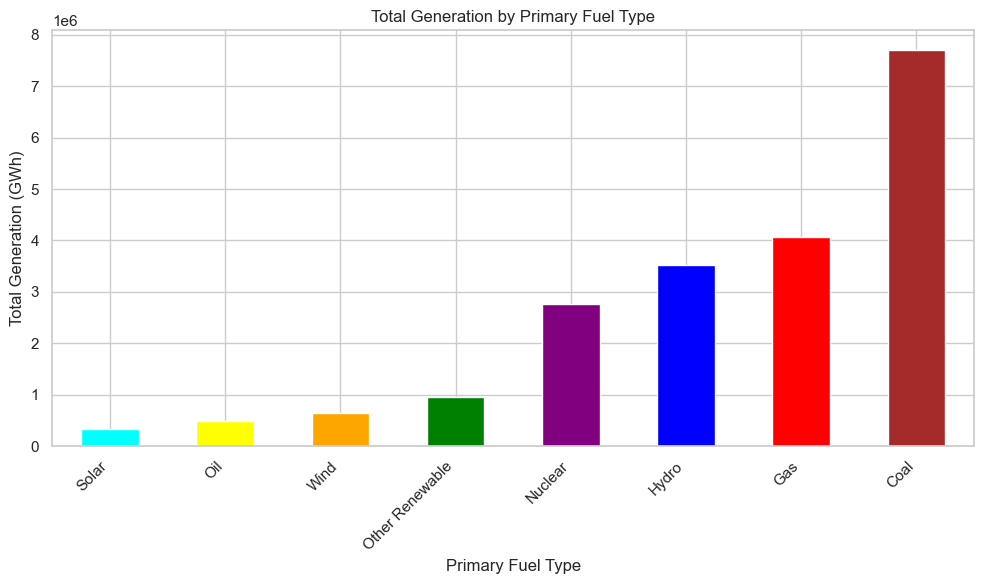

In [52]:
import matplotlib.pyplot as plt

# Group the data by primary fuel and calculate the total generation for each fuel type
generation_by_fuel_type = df_cleaned.groupby('primary_fuel')['average_generation'].sum().sort_values()

# Define the colors for each bar
bar_colors = ['cyan', 'yellow', 'orange', 'green', 'purple', 'blue', 'red', 'brown']

# Create a bar chart with manually set colors
plt.figure(figsize=(10, 6))
generation_by_fuel_type.plot(kind='bar', color=bar_colors[:len(generation_by_fuel_type)])  # Use the custom color list

# Add labels and title
plt.xlabel('Primary Fuel Type')
plt.ylabel('Total Generation (GWh)')
plt.title('Total Generation by Primary Fuel Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Capacity vs Plant Age

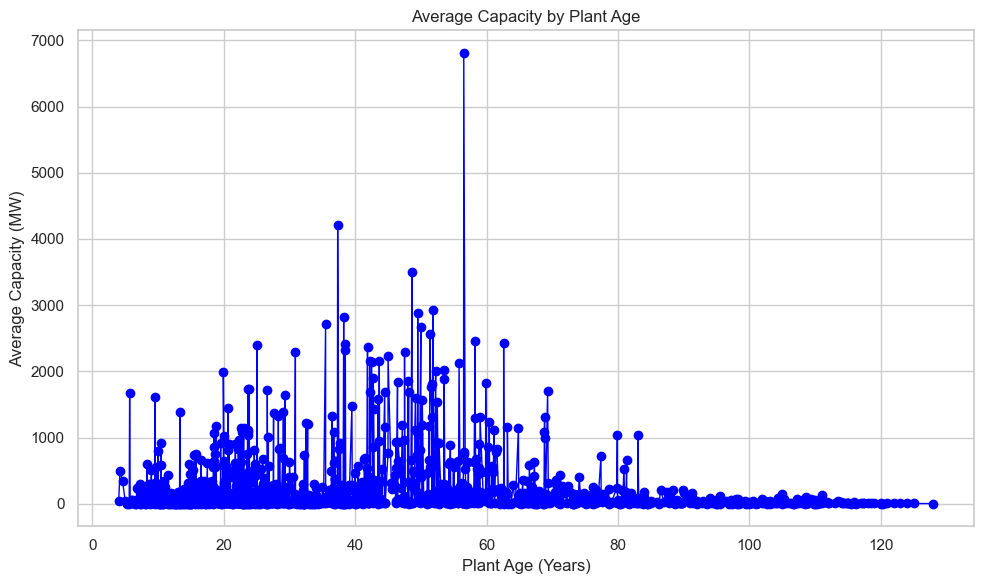

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns  # Ensure seaborn is imported

# Filter out rows where plant_age is not missing
df_with_age = df_cleaned.dropna(subset=['plant_age'])

# Group the data by plant age and calculate the average capacity
average_capacity_by_age = df_with_age.groupby('plant_age')['capacity_mw'].mean()

# Set the style to 'whitegrid'
sns.set_style("whitegrid")

# Create a line plot of average capacity by plant age with reduced line thickness
plt.figure(figsize=(10, 6))
plt.plot(average_capacity_by_age.index, average_capacity_by_age.values, marker='o', color='blue', linewidth=1)  # Set the linewidth to 1

# Add labels and title
plt.xlabel('Plant Age (Years)')
plt.ylabel('Average Capacity (MW)')
plt.title('Average Capacity by Plant Age')

# Show the plot
plt.tight_layout()
plt.show()

Generation vs Capacity by Fuel Type

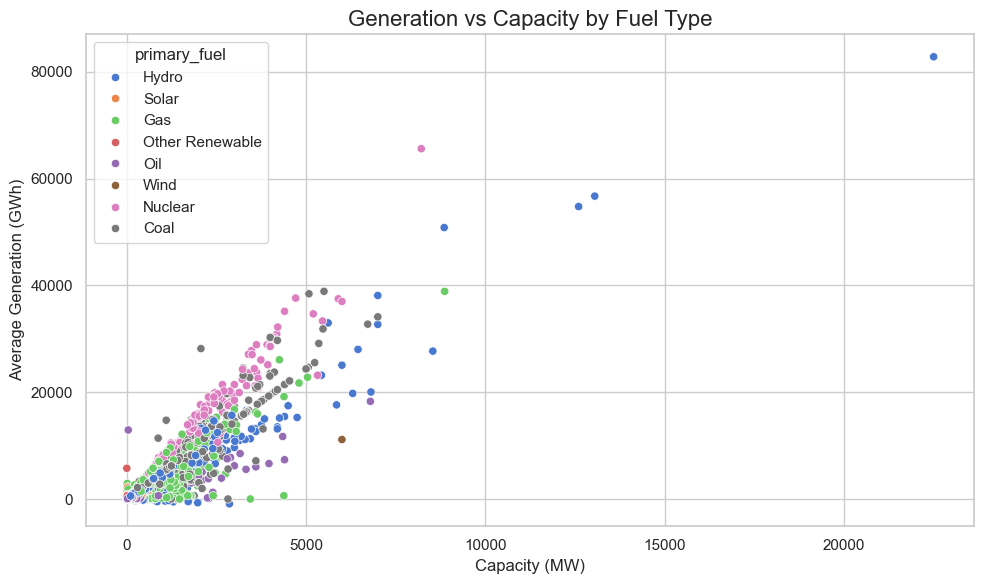

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a scatter plot to visualize the relationship between generation and capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capacity_mw', y='average_generation', data=df_cleaned, hue='primary_fuel', palette='muted')

# Add a title and labels
plt.title('Generation vs Capacity by Fuel Type', fontsize=16)
plt.xlabel('Capacity (MW)', fontsize=12)
plt.ylabel('Average Generation (GWh)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Geographic Distribution of Power Plants by Fuel type 

C:\Users\silve\AppData\Local\Temp\ipykernel_10964\1532565507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['primary_fuel_grouped'] = df_cleaned['primary_fuel'].apply(


primary_fuel_grouped
Renewables    25900
Gas            3073
Oil            2110
Coal           1909
Name: count, dtype: int64


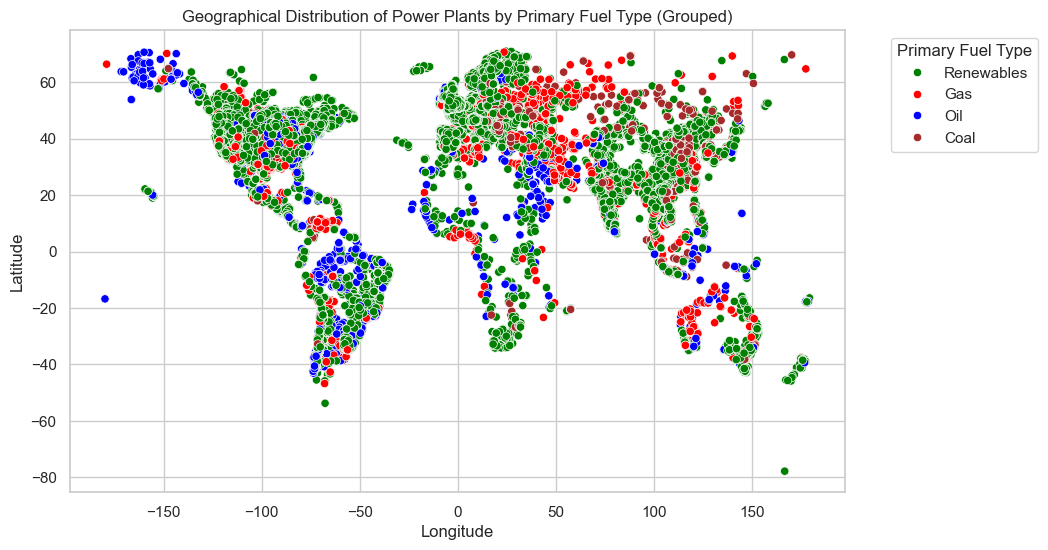

In [55]:
# Define the categories for grouping fuel types
non_renewables = ['Oil', 'Gas', 'Coal']
df_cleaned['primary_fuel_grouped'] = df_cleaned['primary_fuel'].apply(
    lambda x: x if x in non_renewables else 'Renewables'
)

# Verify the grouping
print(df_cleaned['primary_fuel_grouped'].value_counts())

# Define the custom color palette for the new groups
color_palette = {
    'Coal': 'brown',
    'Gas': 'red',
    'Oil': 'blue',
    'Renewables': 'green'
}

# Create the scatter plot of power plants by geographical location with the updated color palette
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel_grouped', data=df_cleaned, palette=color_palette)
plt.title('Geographical Distribution of Power Plants by Primary Fuel Type (Grouped)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Primary Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Couunts of Fuel Type by Class

C:\Users\silve\AppData\Local\Temp\ipykernel_10964\3588106839.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  classification_counts = df_cleaned.groupby(['primary_fuel_grouped', 'generation_class_4']).size().unstack(fill_value=0)


generation_class_4    very_low   low   mid  high
primary_fuel_grouped                            
Coal                        19    36   113  1741
Gas                        390   417   475  1791
Oil                       1298   239   243   330
Renewables                7807  7677  5524  4892


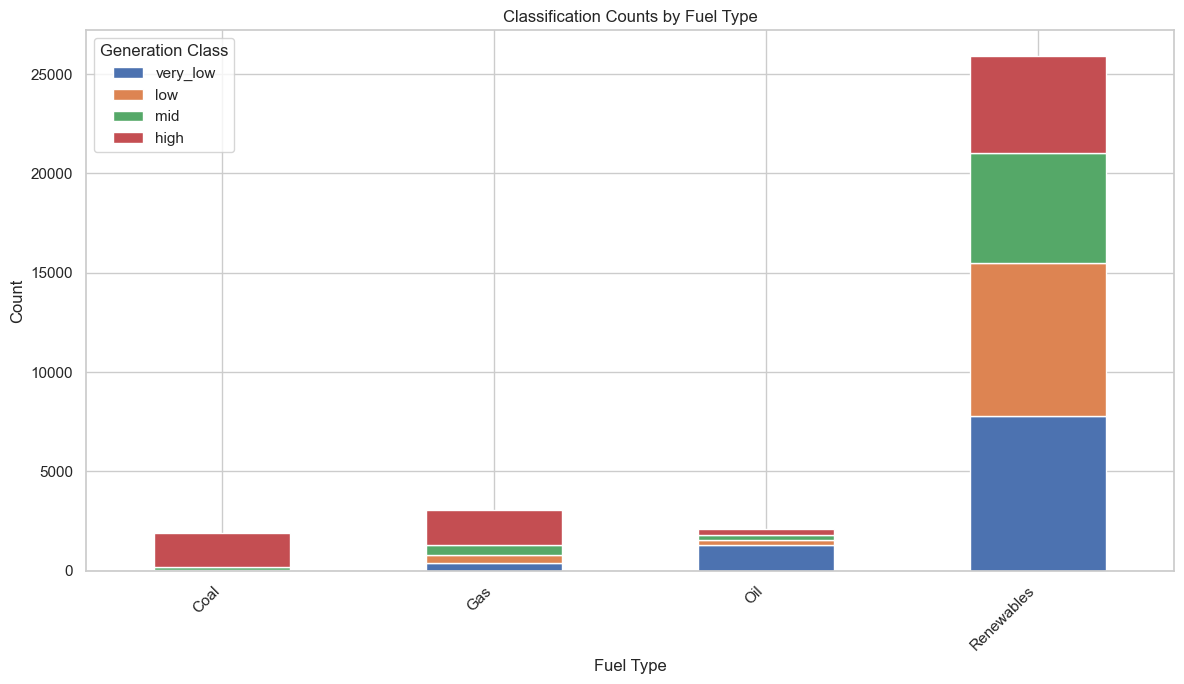

In [56]:
# Group by 'primary_fuel_grouped' and 'generation_class_4' and count occurrences
classification_counts = df_cleaned.groupby(['primary_fuel_grouped', 'generation_class_4']).size().unstack(fill_value=0)

# Display the counts of each classification for each fuel type
print(classification_counts)

# Optional: Display the result as a bar plot
classification_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Classification Counts by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.legend(title='Generation Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Generation By Fuel Type Classes

C:\Users\silve\AppData\Local\Temp\ipykernel_10964\533085925.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(['primary_fuel_grouped', 'generation_class_4'])['average_generation'].mean().unstack(fill_value=0)


generation_class_4    very_low        low         mid         high
primary_fuel_grouped                                              
Coal                  1.004038  31.232051  118.068886  4414.035646
Gas                   3.300603  27.279771  106.976912  2237.641295
Oil                   2.359007  25.750053  108.488376  1382.163983
Renewables            3.745929  24.516976  100.190574  1526.874621


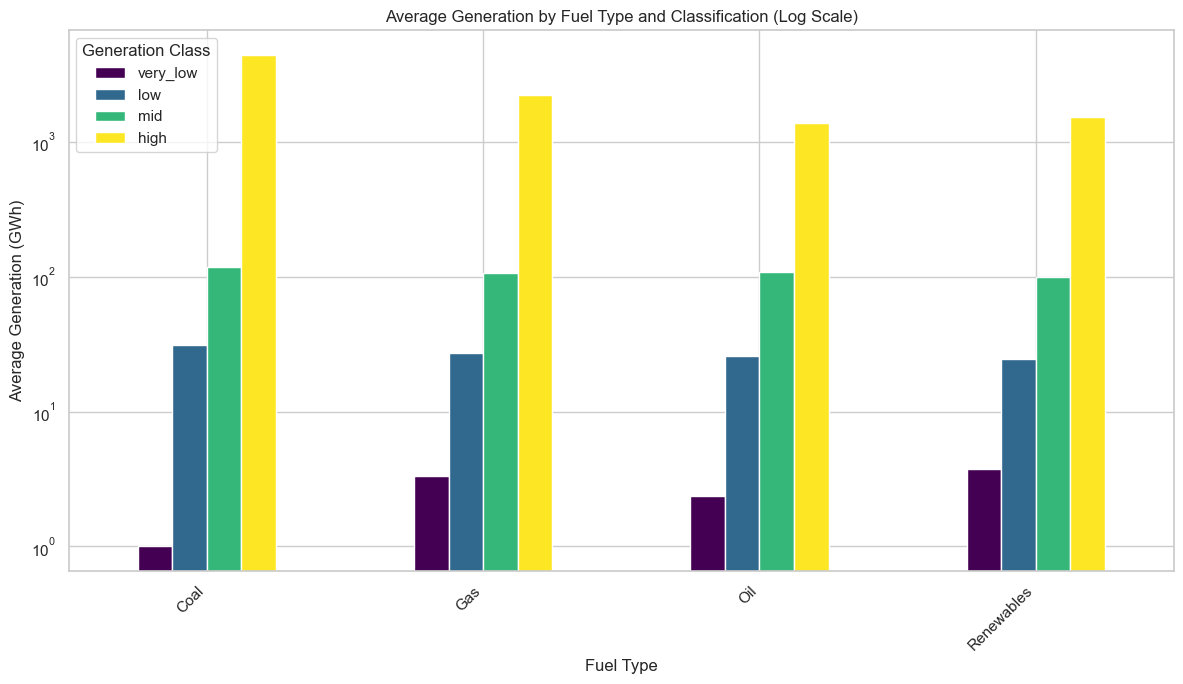

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'primary_fuel_grouped' and 'generation_class_4' and calculate the mean average_generation
grouped_data = df_cleaned.groupby(['primary_fuel_grouped', 'generation_class_4'])['average_generation'].mean().unstack(fill_value=0)

# Display the grouped data
print(grouped_data)

# Plot the result as a bar plot with log scale
grouped_data.plot(kind='bar', stacked=False, figsize=(12, 7), colormap='viridis')
plt.title('Average Generation by Fuel Type and Classification (Log Scale)')
plt.xlabel('Fuel Type')
plt.ylabel('Average Generation (GWh)')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.legend(title='Generation Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Distribution of Generation Classes

C:\Users\silve\AppData\Local\Temp\ipykernel_10964\340361507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


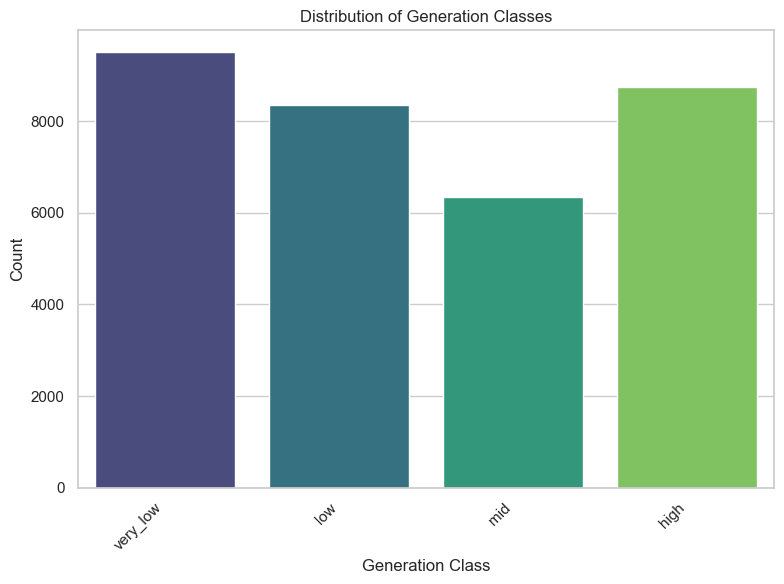

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df_cleaned['generation_class_4'].value_counts()

# Plotting the distribution of the classes
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Generation Classes')
plt.xlabel('Generation Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Predictive Model 
#Splitting the Data

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import os

# Step 1: Encode 'primary_fuel' if not already encoded
if 'primary_fuel_encoded' not in df_cleaned.columns:
    le = LabelEncoder()
    df_cleaned.loc[:, 'primary_fuel_encoded'] = le.fit_transform(df_cleaned['primary_fuel'])

# Step 2: Define features and target
X = df_cleaned[['latitude', 'longitude', 'plant_age', 'capacity_mw', 'primary_fuel_encoded']]
y = df_cleaned['generation_class_4']

# Step 3: Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize the scaler
scaler = StandardScaler()

# Step 5: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled features
print("First 5 rows of scaled training data:\n", X_train_scaled[:5])



First 5 rows of scaled training data:
 [[-2.18292416 -0.51314895 -0.95918484 -0.31253573 -0.96714733]
 [-2.81315734 -0.68652501 -0.00601717 -0.30338921  0.75562406]
 [ 0.03602771 -0.97883378  0.24533622 -0.30316961 -1.39784018]
 [-2.72938863  1.97242685 -0.00601717 -0.28911493 -1.39784018]
 [ 1.07572456 -0.01320498 -0.00601717 -0.32117715 -0.96714733]]


C:\Users\silve\AppData\Local\Temp\ipykernel_10964\669547014.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'primary_fuel_encoded'] = le.fit_transform(df_cleaned['primary_fuel'])


# Running Baseline Models 

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 5: Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# Step 6: Train and evaluate the models
for name, model in models.items():
    # Use scaled data for Logistic Regression and SVM
    if name in ["Logistic Regression", "Support Vector Machine"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Print the results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")



Logistic Regression Results:
Accuracy: 0.6450
Classification Report:
              precision    recall  f1-score   support

        high       0.86      0.76      0.81      2622
         low       0.57      0.47      0.51      2566
         mid       0.71      0.42      0.53      1857
    very_low       0.55      0.84      0.67      2853

    accuracy                           0.64      9898
   macro avg       0.67      0.62      0.63      9898
weighted avg       0.67      0.64      0.64      9898


Random Forest Results:
Accuracy: 0.9221
Classification Report:
              precision    recall  f1-score   support

        high       0.91      0.95      0.93      2622
         low       0.92      0.91      0.92      2566
         mid       0.90      0.89      0.90      1857
    very_low       0.95      0.93      0.94      2853

    accuracy                           0.92      9898
   macro avg       0.92      0.92      0.92      9898
weighted avg       0.92      0.92      0.92      98

In [62]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import os

# Example: Training the model (assuming you have X_train and y_train)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Define the file path where you want to save the model
file_path = r"C:\Users\silve\OneDrive\Documents\Energy-Model-Deploy\random1_forest_model.pkl"

# Ensure the directory exists
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the trained model to the specified file path
with open(file_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to {file_path}")


Model saved to C:\Users\silve\OneDrive\Documents\Energy-Model-Deploy\random1_forest_model.pkl


In [65]:
import pickle

# Load the model from the file
file_path = r"C:\Users\silve\OneDrive\Documents\random_forest_model.pkl"
with open(file_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Check the type of the loaded model
print(f"Loaded model type: {type(loaded_model)}")


Loaded model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [64]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming you have trained your model on X_train and y_train
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model
file_path = r"C:\Users\silve\OneDrive\Documents\random_forest_model.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully!")


Model saved successfully!


# Tuning Best Model (Random Forest) With RandomizedSearchCV

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the updated parameter grid for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Replacing 'auto' with 'sqrt' and 'log2'
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV model
random_search.fit(X_train_scaled, y_train)

# Print the best parameters found by Randomized Search
print("Best Parameters: ", random_search.best_params_)

# Evaluate on the test set
y_pred = random_search.best_estimator_.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Accuracy:  0.923216811477066
Classification Report:
               precision    recall  f1-score   support

        high       0.92      0.95      0.93      2622
         low       0.92      0.91      0.92      2566
         mid       0.90      0.90      0.90      1857
    very_low       0.95      0.93      0.94      2853

    accuracy                           0.92      9898
   macro avg       0.92      0.92      0.92      9898
weighted avg       0.92      0.92      0.92      9898



# Tuning Random Forest with GridSearchCV

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replaced 'auto' with valid options
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by Grid Search
print("Best Parameters: ", grid_search.best_params_)

# Evaluate on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy:  0.9234188724994948
Classification Report:
               precision    recall  f1-score   support

        high       0.92      0.95      0.93      2622
         low       0.92      0.91      0.92      2566
         mid       0.90      0.90      0.90      1857
    very_low       0.95      0.93      0.94      2853

    accuracy                           0.92      9898
   macro avg       0.92      0.92      0.92      9898
weighted avg       0.92      0.92      0.92      9898



# Tuning Random Forest with RandomziedSearchCV and data Agumentation
Augmenting the Data by tripling it with noise based on features

In [33]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Function to augment data by applying random perturbations
def augment_data(df, n_augmentations=2, jitter=0.01):
    augmented_data = []
    
    for i in range(n_augmentations):
        df_aug = df.copy()
        for col in ['latitude', 'longitude', 'plant_age', 'capacity_mw']:
            noise = jitter * np.random.randn(*df[col].shape) * df[col].mean()
            df_aug[col] = df_aug[col] + noise
        augmented_data.append(df_aug)
    
    return pd.concat(augmented_data, axis=0)

# Original data
X = df_cleaned[['latitude', 'longitude', 'plant_age', 'capacity_mw', 'primary_fuel_encoded']]
y = df_cleaned['generation_class_4']

# Apply data augmentation to increase the size of the dataset
df_augmented = augment_data(df_cleaned, n_augmentations=3)

# Update features and target after augmentation
X_augmented = df_augmented[['latitude', 'longitude', 'plant_age', 'capacity_mw', 'primary_fuel_encoded']]
y_augmented = df_augmented['generation_class_4']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.3, random_state=42)

# Initialize a scaler and scale the features (optional, depending on the model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV model
random_search.fit(X_train_scaled, y_train)

# Print the best parameters found by Randomized Search
print("Best Parameters: ", random_search.best_params_)

# Evaluate the model on the test set
y_pred = random_search.best_estimator_.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Accuracy:  0.9336880746303843
Classification Report:
               precision    recall  f1-score   support

        high       0.97      0.97      0.97      7898
         low       0.90      0.90      0.90      7588
         mid       0.96      0.94      0.95      5693
    very_low       0.92      0.92      0.92      8514

    accuracy                           0.93     29693
   macro avg       0.94      0.93      0.93     29693
weighted avg       0.93      0.93      0.93     29693



# Retuning Model with more Data Augmentation
Augmenting by 5 folds

In [36]:

# Function to augment data by applying random perturbations
def augment_data(df, n_augmentations=5, jitter=0.01):
    augmented_data = []
    
    for i in range(n_augmentations):
        df_aug = df.copy()
        for col in ['latitude', 'longitude', 'plant_age', 'capacity_mw']:
            noise = jitter * np.random.randn(*df[col].shape) * df[col].mean()
            df_aug[col] = df_aug[col] + noise
        augmented_data.append(df_aug)
    
    return pd.concat(augmented_data, axis=0)

# Original data
X = df_cleaned[['latitude', 'longitude', 'plant_age', 'capacity_mw', 'primary_fuel_encoded']]
y = df_cleaned['generation_class_4']

# Apply data augmentation to increase the size of the dataset
df_augmented = augment_data(df_cleaned, n_augmentations=5)

# Update features and target after augmentation
X_augmented = df_augmented[['latitude', 'longitude', 'plant_age', 'capacity_mw', 'primary_fuel_encoded']]
y_augmented = df_augmented['generation_class_4']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.3, random_state=42)

# Initialize a scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a more focused grid based on the best parameters found previously
param_grid = {
    'n_estimators': [250, 300, 350],  # Focus around the best value
    'max_depth': [None, 30, 40],      # Include None and higher values
    'min_samples_split': [2, 3],      # Fine-tuning around the best value
    'min_samples_leaf': [1, 2],       # Exploring small leaf values
    'max_features': ['sqrt']          # Keeping 'sqrt' as it worked well
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object with 10-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=10, verbose=2, n_jobs=-1)

# Fit the GridSearchCV model using the augmented data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by Grid Search
print("Best Parameters: ", grid_search.best_params_)

# Evaluate on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Accuracy:  0.9468760103459425
Classification Report:
               precision    recall  f1-score   support

        high       0.98      0.98      0.98     13205
         low       0.92      0.91      0.91     12521
         mid       0.97      0.97      0.97      9490
    very_low       0.92      0.94      0.93     14272

    accuracy                           0.95     49488
   macro avg       0.95      0.95      0.95     49488
weighted avg       0.95      0.95      0.95     49488



# Displaying Confusion Matrix for best tuned model

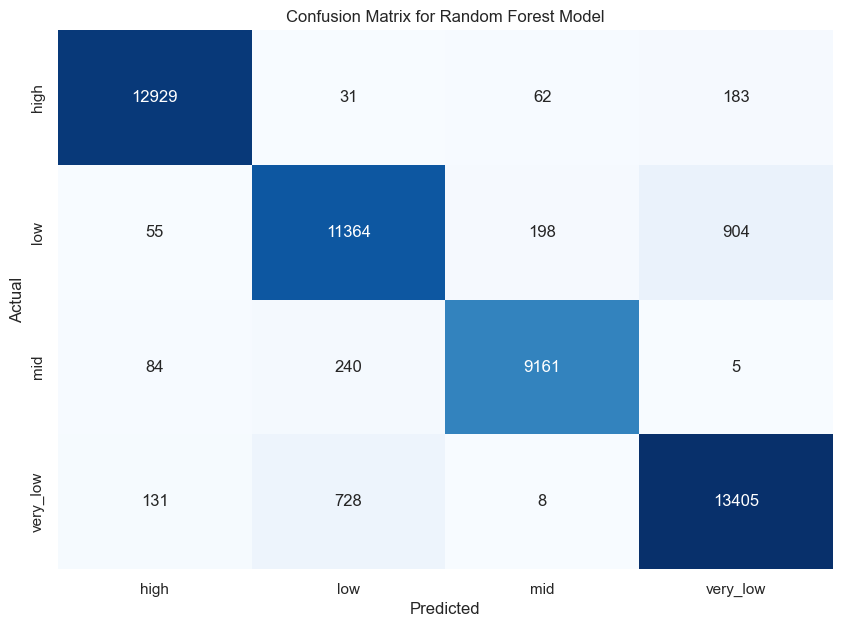

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['high', 'low', 'mid', 'very_low'], 
            yticklabels=['high', 'low', 'mid', 'very_low'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()



# Displaying Feature Importance For Best model

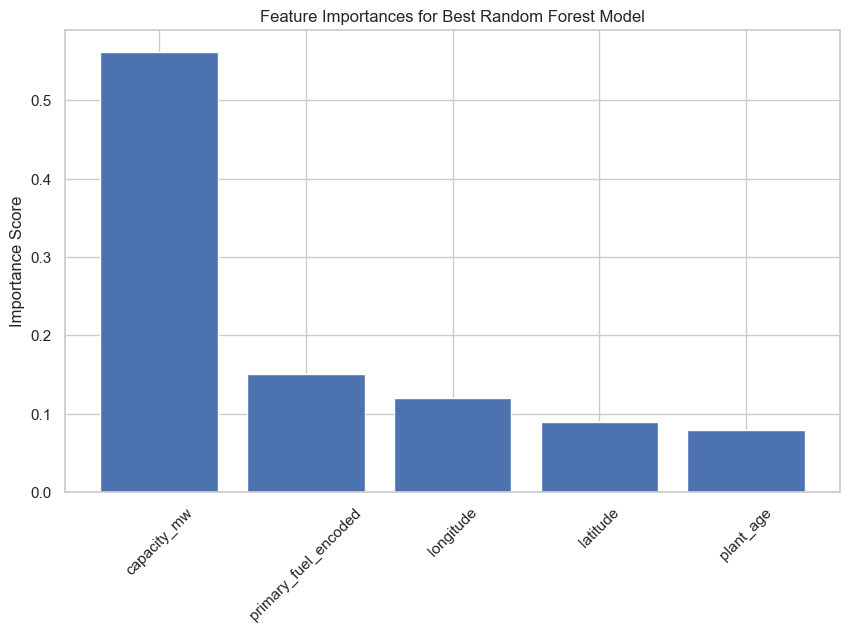

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the feature importances from the best model
best_rf_model = grid_search.best_estimator_
feature_importances = best_rf_model.feature_importances_

# Define the feature names (ensure these match your feature order)
feature_names = ['latitude', 'longitude', 'plant_age', 'capacity_mw', 'primary_fuel_encoded']

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Best Random Forest Model")
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx], rotation=45)
plt.ylabel('Importance Score')
plt.show()

